In [165]:
## Import Library
import folium
import geopandas as gpd

In [166]:
data = gpd.read_file('/content/drive/MyDrive/training_ml_geospasial_geosoftware/MiniProject2/Hasil_KlasifikasiSpasial_RF_processed_jkt/processed_jkt_rf.shp')

In [167]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 51 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECT_ID   267 non-null    float64 
 1   KODE_DESA   267 non-null    object  
 2   DESA        267 non-null    object  
 3   KODE        267 non-null    float64 
 4   PROVINSI    267 non-null    object  
 5   KAB_KOTA    267 non-null    object  
 6   KECAMATAN   267 non-null    object  
 7   DESA_KELUR  267 non-null    object  
 8   JUMLAH_PEN  267 non-null    float64 
 9   JUMLAH_KK   267 non-null    float64 
 10  LUAS_WILAY  267 non-null    float64 
 11  KEPADATAN   267 non-null    float64 
 12  PERPINDAHA  267 non-null    float64 
 13  PERUBAHAN   267 non-null    float64 
 14  WAJIB_KTP   267 non-null    float64 
 15  ISLAM       267 non-null    float64 
 16  KRISTEN     267 non-null    float64 
 17  KHATOLIK    267 non-null    float64 
 18  HINDU       267 non-null    float64 
 19  

In [168]:
## Label Kategori
label_map = {0: 'Low', 1: 'Medium', 2:'High'}
data['prediksi_label'] = data['prediksi_r'].map(label_map)

## Mengatur warna
color_dict = {'Low': 'green', 'Medium': 'yellow', 'High': 'red'}

## Pengaturan tampilan
def style_function(feature):
  risk = feature['properties']['prediksi_label']
  return {
      'fillColor': color_dict.get(risk, 'gray'),
      'color': 'black',
      'weight': 0.5,
      'fillOpacity' : 0.5
  }

In [169]:
m = folium.Map(location=[-6.1753924, 106.8271528], zoom_start=10, tiles = None, control_scale=True)

In [170]:
## Menambah Basemap
folium.TileLayer('Cartodb Positron', attr='Map Tiles by Cartodb').add_to(m)
folium.TileLayer('Cartodb dark_matter', attr='Map Tiles by Cartodb').add_to(m)
folium.TileLayer('OpenStreetMap', attr='Map Tiles by Cartodb').add_to(m)

In [171]:
## Menambahkan data geospasial
predris_layer = folium.FeatureGroup(name="Prediksi Risiko", show=True).add_to(m)
folium.GeoJson(
    data,
    #name= 'Prediksi Risiko',
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['DESA','KECAMATAN','KAB_KOTA','JUMLAH_PEN','prediksi_label'],
        aliases = ['Desa','Kecamatan', 'Kota','Jumlah Penduduk','Risiko'],
    )
).add_to(predris_layer)

In [172]:
from branca.element import Template, MacroElement

# Template legenda
legend_html = """
{% macro html(this, kwargs) %}

<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 200px;
    background-color: white;
    border: 2px solid grey;
    z-index: 9999;
    font-size: 14px;
    padding: 10px;
    box-shadow: 2px 2px 5px rgba(0,0,0,0.4);
    line-height: 1.6;
">
    <b>Risiko</b><br>
    <div><i style="background:green; width:12px; height:12px; display:inline-block; margin-right:6px; vertical-align:middle;"></i> Low</div>
    <div><i style="background:yellow; width:12px; height:12px; display:inline-block; margin-right:6px; vertical-align:middle;"></i> Medium</div>
    <div><i style="background:red; width:12px; height:12px; display:inline-block; margin-right:6px; vertical-align:middle;"></i> High</div>

    <br><b>Tutupan Lahan</b><br>
    <div><i style="background:yellow; width:12px; height:12px; display:inline-block; margin-right:6px; vertical-align:middle;"></i> Lahan Terbuka : 0</div>
    <div><i style="background:black; width:12px; height:12px; display:inline-block; margin-right:6px; vertical-align:middle;"></i> Awan : 1</div>
    <div><i style="background:brown; width:12px; height:12px; display:inline-block; margin-right:6px; vertical-align:middle;"></i> Tanah Perkotaan : 2</div>
    <div><i style="background:green; width:12px; height:12px; display:inline-block; margin-right:6px; vertical-align:middle;"></i> Vegetasi : 3</div>
</div>

{% endmacro %}
"""


# Tambahkan ke peta
legend = MacroElement()
legend._template = Template(legend_html)
m.get_root().add_child(legend)

Output hidden; open in https://colab.research.google.com to view.

In [173]:
## Visualisasi Data Raster Landsat
!pip install rasterio

In [174]:
## Import Library
import folium
import rasterio
import numpy as np
from matplotlib import colors
from PIL import Image

In [175]:
## Input data Raster
kmeans_tif = '/content/drive/MyDrive/training_ml_geospasial_geosoftware/MiniProject2/Hasil_SegmentasiCitra-Landsat.tif'

In [176]:
with rasterio.open(kmeans_tif) as src:
    kmeans_array = src.read(1)
    bounds = src.bounds
    nodata_val = src.nodata if src.nodata is not None else 0

In [177]:
unique_classes = np.unique(kmeans_array[kmeans_array != nodata_val])

In [178]:
## menentukan warna
color_list = ['yellow','black','brown','green']
class_color_map = dict(zip(unique_classes, color_list))

In [179]:
class_color_map

{np.int32(0): 'yellow',
 np.int32(1): 'black',
 np.int32(2): 'brown',
 np.int32(3): 'green'}

In [180]:
cmap = colors.ListedColormap(color_list)

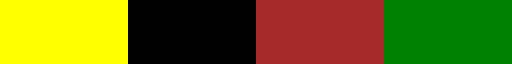

In [181]:
cmap

In [182]:
boundaries = list(range(len(unique_classes) + 1))
norm = colors.BoundaryNorm(boundaries, ncolors=len(color_list))

In [183]:
from rasterio.features import shapes
import geopandas as gpd
import json

In [184]:
mask = kmeans_array != nodata_val
results = (
    {"properties": {"value": int(v)}, "geometry": s}
    for s, v in shapes(kmeans_array, mask=mask, transform=src.transform)
)

geoms = list(results)
gdf = gpd.GeoDataFrame.from_features(geoms)

In [185]:
gdf.crs = src.crs

In [186]:
gdf.to_file('/content/Hasil_kmeans.geojson', driver="GeoJSON")

In [187]:
# Baca file GeoJSON hasil konversi
with open("Hasil_kmeans.geojson") as f:
    geojson_data = json.load(f)

# Peta label klasifikasi
cluster_label_map = {
    0: "Lahan Terbuka",
    1: "Awan",
    2: "Tanah Perkotaan",
    3: "Vegetasi"
}

# Tambahkan field 'cluster_label' ke setiap fitur
for feature in geojson_data["features"]:
    cluster_value = feature["properties"]["value"]
    feature["properties"]["cluster_label"] = cluster_label_map.get(cluster_value, "Tidak diketahui")

kmeans_layer = folium.FeatureGroup(name="Tutupan Lahan", show=True).add_to(m)
# Tambahkan layer interaktif GeoJSON
folium.GeoJson(
    geojson_data,
    #name="K-Means",
    style_function=lambda feature: {
        "fillColor": class_color_map.get(feature["properties"]["value"], "gray"),
        "color": "black",
        "weight": 0.3,
        "fillOpacity": 0.5,
    },
    highlight_function=lambda feature: {
        "weight": 2,
        "color": "blue",
        "fillOpacity": 0.7,
    },
    tooltip=folium.GeoJsonTooltip(fields=["value","cluster_label"], aliases=["Kode Cluster:", "Keterangan :"]),
    popup=folium.GeoJsonPopup(fields=["cluster_label"])
).add_to(kmeans_layer)

In [188]:
folium.LayerControl().add_to(m)

In [191]:
m.save('/content/drive/MyDrive/training_ml_geospasial_geosoftware/MiniProject2/peta_miniproject2.html')

In [189]:
m

Output hidden; open in https://colab.research.google.com to view.